# Logistic Regression
In this notebook, we implemented and evaluated a Logistic Regression model to predict auto loan default (bad_flag).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve
import xgboost as xgb
from sklearn.metrics import classification_report

## Load & Preprocess Data

In [2]:
train_path = "/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv"
eval_path = "/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)

Train shape: (21348, 28)
Eval shape: (5336, 28)


## Logistic Regression

CV Scores: [0.987061   0.98524522 0.97968624]
Mean CV Score: 0.9839974871315924
Classification Report:               precision    recall  f1-score   support

           0       0.11      0.75      0.19       958
           1       0.98      0.71      0.82     20390

    accuracy                           0.71     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.71      0.79     21348



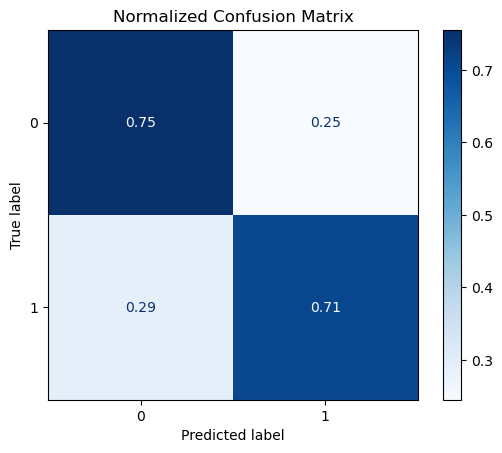

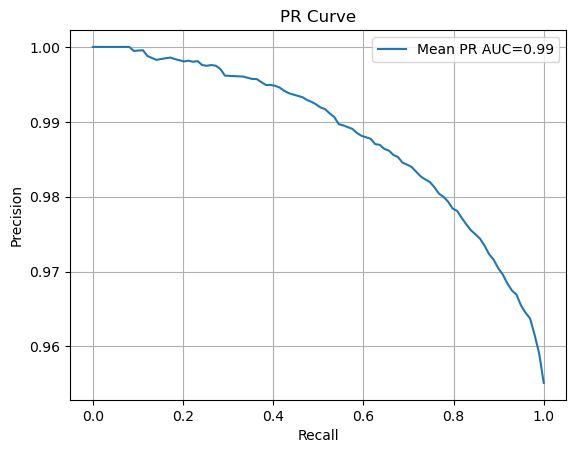

Mean PR AUC: 0.9883


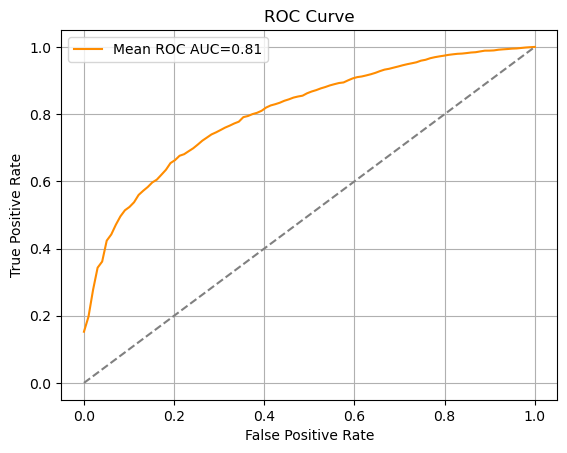

Mean ROC AUC: 0.8063


,precision,recall,f1-score,support
0,0.107991,0.754697,0.188946,958.000000
1,0.983962,0.707111,0.822875,20390.000000
accuracy,0.709247,0.709247,0.709247,0.709247
macro avg,0.545977,0.730904,0.505910,21348.000000
weighted avg,0.944653,0.709247,0.794427,21348.000000


In [3]:
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')
evaluate_models(logreg, X_train_processed, y_train)

Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
CV Scores: [0.987061   0.98524522 0.97969033]
Mean CV Score: 0.9839988487347187
Classification Report:               precision    recall  f1-score   support

           0       0.11      0.75      0.19       958
           1       0.98      0.71      0.82     20390

    accuracy                           0.71     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.71      0.79     21348



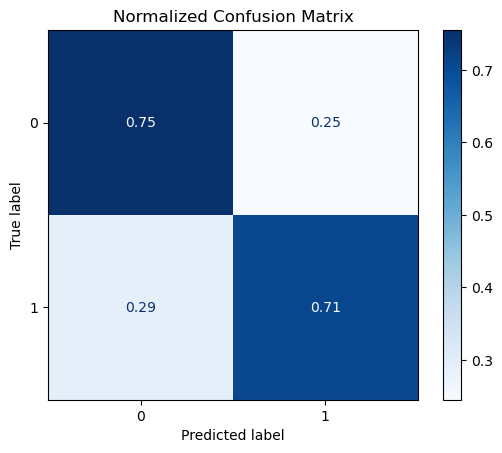

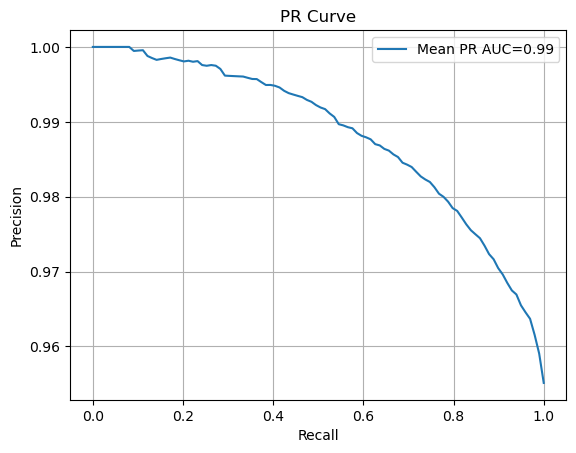

Mean PR AUC: 0.9883


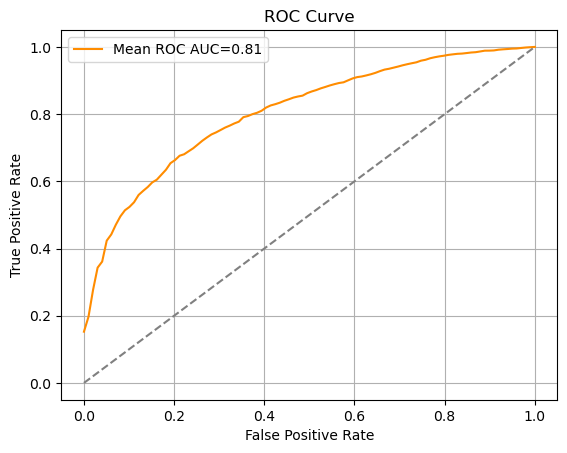

Mean ROC AUC: 0.8063


,precision,recall,f1-score,support
0,0.108007,0.754697,0.188970,958.000000
1,0.983963,0.707160,0.822908,20390.000000
accuracy,0.709294,0.709294,0.709294,0.709294
macro avg,0.545985,0.730929,0.505939,21348.000000
weighted avg,0.944655,0.709294,0.794460,21348.000000


In [4]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Needed for L1
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, scoring='f1', cv=3)
grid.fit(X_train_processed, y_train)

print("Best Params:", grid.best_params_)
evaluate_models(grid.best_estimator_, X_train_processed, y_train)

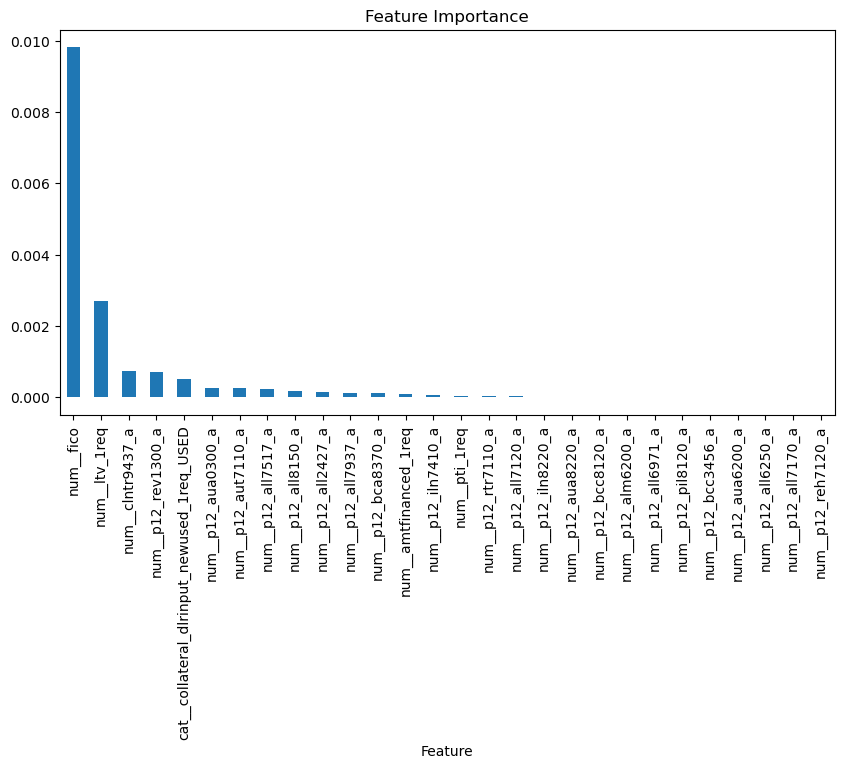

,Feature,Importance
0,num__fico,9.811069e-03
3,num__ltv_1req,2.704147e-03
26,num__clntr9437_a,7.442120e-04
11,num__p12_rev1300_a,7.019987e-04
27,cat__collateral_dlrinput_newused_1req_USED,5.018112e-04
19,num__p12_aua0300_a,2.727815e-04
6,num__p12_aut7110_a,2.619592e-04
14,num__p12_all7517_a,2.402342e-04
12,num__p12_all8150_a,1.647024e-04
23,num__p12_all2427_a,1.425812e-04


In [5]:
X_named = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

logreg = LogisticRegression(max_iter=5000, class_weight='balanced')
logreg.fit(X_named, y_train)


feature_importance(logreg, X_named, y_train, metric='average_precision')


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.14      0.52      0.22       242
           1       0.97      0.84      0.90      5094

    accuracy                           0.83      5336
   macro avg       0.56      0.68      0.56      5336
weighted avg       0.94      0.83      0.87      5336



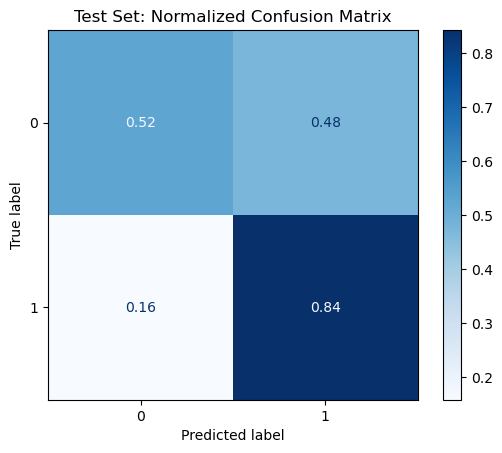

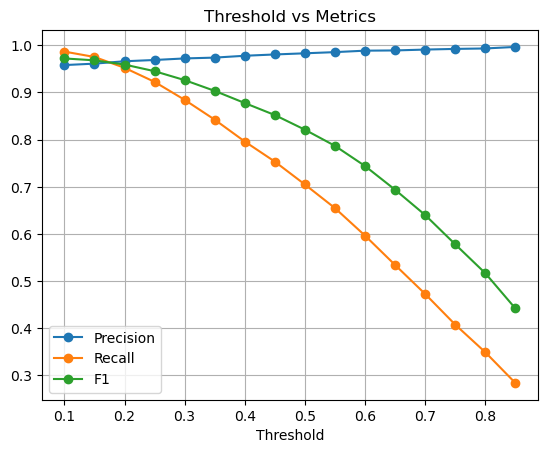

,Threshold,Precision,Recall,F1
0,0.10,0.958063,0.986651,0.972147
1,0.15,0.961114,0.975265,0.968138
2,0.20,0.966142,0.952297,0.959170
3,0.25,0.968866,0.922458,0.945093
4,0.30,0.972162,0.884374,0.926192
5,0.35,0.973899,0.842364,0.903368
6,0.40,0.977815,0.796035,0.877611
7,0.45,0.980583,0.753435,0.852131
8,0.50,0.983028,0.704947,0.821082
9,0.55,0.985524,0.654888,0.786885


In [8]:
import matplotlib.pyplot as plt

X_eval_named = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())

#Predict probabilities and labels
y_eval_proba = logreg.predict_proba(X_eval_named)[:, 1]
y_eval_pred = (y_eval_proba >= 0.35).astype(int)  # Change threshold if you tuned it

#Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_eval_pred))

#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_eval, y_eval_pred, normalize='true', cmap='Blues')
plt.title("Test Set: Normalized Confusion Matrix")
plt.grid(False)
plt.show()

#Precision-Recall / ROC Curve on Test Set
from model_evaluation import threshold_analysis
threshold_analysis(y_eval, y_eval_proba)
